<a href="https://colab.research.google.com/github/dcolinmorgan/grph/blob/main/GRN_bootstrap_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ScenicPlus Bootstrap tutorial

## gather multiple runs

In [ ]:
# import pandas as pd
# import os

# # Specify the base directory to search for files
# base_directory = '/Users/apple/Developer/dcolinmorgan/scenicplus/scplus_pipeline'

# # List to hold DataFrames
# dataframes = []

# # Loop through the directory and its subdirectories
# for root, dirs, files in os.walk(base_directory):
#     for file in files:
#         if file == 'eRegulon*.tsv': # s_extended.tsv':  # Check for the specific file name
#             file_path = os.path.join(root, file)  # Get the full file path
#             df = pd.read_csv(file_path, sep='\t')  # Load the DataFrame (assuming tab-separated values)
#             df['source_file'] = file_path  # Add a new column with the file path
#             dataframes.append(df)  # Append to the list

# # Optionally, concatenate all DataFrames into a single DataFrame
# combined_df = pd.concat(dataframes, ignore_index=True)

# # Print the combined DataFrame
# print(combined_df)


In [ ]:
import pandas as pd
# !zip -d /content/drive/MyDrive/SU/GRN-bootstrap-chapter/directANDextended_combined_df.txt.zip __MACOSX/\*
data=pd.read_csv('/content/drive/MyDrive/SU/GRN-bootstrap-chapter/directANDextended_combined_df.txt.zip',sep='\t')

deleting: __MACOSX/._directANDextended_combined_df.txt


In [ ]:
data.source_file=data.source_file.str.split('/').str[7]

## naive edge count per ScenicPlus run

In [ ]:
count=data.source_file.value_counts()
count

,count
source_file,
run6,144113
run10,138891
run4,136875
run3,133909
run9,132933
run2,131809
run8,128147
run7,126583
run1,118074


In [ ]:
data[['Gene','TF','importance_TF2G','rho_TF2G','triplet_rank']]
# data[['target','TF','source_file']]

,Gene,TF,importance_TF2G,rho_TF2G,triplet_rank
0,PCDHB2,ARID3A,0.072025,0.638654,40371
1,LRMDA,ARID3A,0.228578,0.358036,19260
2,DCHS2,ARID3A,0.050875,0.352265,44200
3,ATCAY,ARID3A,0.050157,0.458091,12008
4,LEKR1,ARID3A,0.052121,0.570661,44435
...,...,...,...,...,...
1304050,HCN1,RFX4,3.853835,-0.179892,162
1304051,MTUS2,RFX4,3.213123,-0.168589,9990
1304052,FGF14,RFX4,2.093614,-0.239278,4133
1304053,GPR158,RFX4,2.035685,-0.180641,11934


In [ ]:
import pandas as pd
import networkx as nx
graphs={}
for i in count.index:
    # Step 1: Create a directed graph
    G = nx.DiGraph()  # Use DiGraph for directed edges, or Graph for undirected

    # Step 3: Add edges to the graph
    for index, row in data[data['source_file']==i].iterrows():
        gene = row['Gene']
        tf = row['TF']
        rho_TF2G = row['rho_TF2G']

        # Add an edge from TF to Gene with weight as rho_TF2G
        G.add_edge(tf, gene, weight=rho_TF2G)
    graphs[f'graph_{i}'] = G


In [ ]:
graphs

{'graph_run6': <networkx.classes.digraph.DiGraph at 0x78b6822f9540>,
 'graph_run10': <networkx.classes.digraph.DiGraph at 0x78b652a84cd0>,
 'graph_run4': <networkx.classes.digraph.DiGraph at 0x78b652a84220>,
 'graph_run3': <networkx.classes.digraph.DiGraph at 0x78b652a84df0>,
 'graph_run9': <networkx.classes.digraph.DiGraph at 0x78b652a84190>,
 'graph_run2': <networkx.classes.digraph.DiGraph at 0x78b652a86d10>,
 'graph_run8': <networkx.classes.digraph.DiGraph at 0x78b652a85390>,
 'graph_run7': <networkx.classes.digraph.DiGraph at 0x78b652a850f0>,
 'graph_run1': <networkx.classes.digraph.DiGraph at 0x78b652a856f0>,
 'graph_run5': <networkx.classes.digraph.DiGraph at 0x78b652a84a30>}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

[]

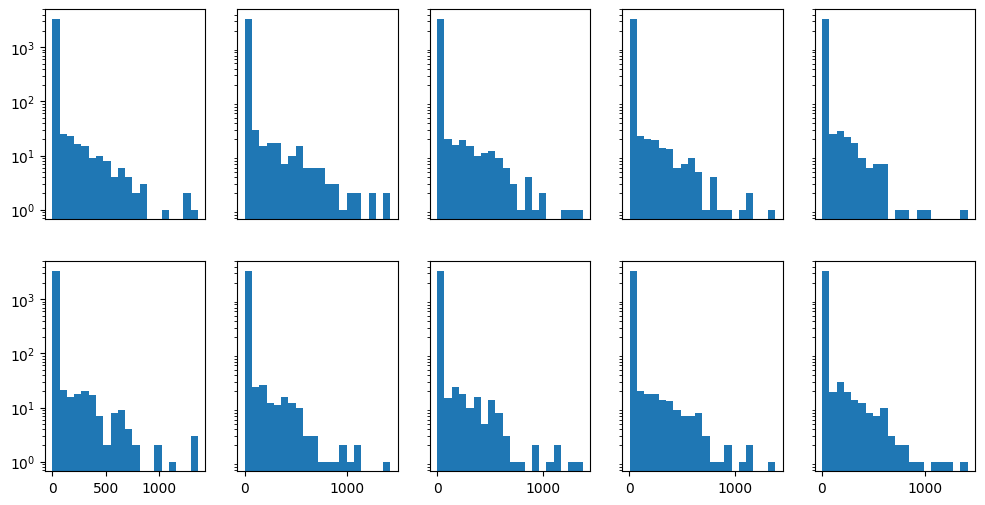

In [ ]:
plt.figure(figsize=(12, 6))

subax1 = plt.subplot2grid((2,5), (0,0))
subax1.set_xticks([])
degrees = [val for (node, val) in graphs['graph_run1'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax2 = plt.subplot2grid((2,5), (0,1))
subax2.set_xticks([])
degrees = [val for (node, val) in graphs['graph_run2'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax2.set_yticks([])
subax3 = plt.subplot2grid((2,5), (0,2))
subax3.set_xticks([])
degrees = [val for (node, val) in graphs['graph_run3'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax3.set_yticks([])
subax4 = plt.subplot2grid((2,5), (0,3))
subax4.set_xticks([])
degrees = [val for (node, val) in graphs['graph_run4'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax4.set_yticks([])
subax5 = plt.subplot2grid((2,5), (0,4))
subax5.set_xticks([])
degrees = [val for (node, val) in graphs['graph_run5'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax5.set_yticks([])
subax6 = plt.subplot2grid((2,5), (1,0))
degrees = [val for (node, val) in graphs['graph_run6'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax7 = plt.subplot2grid((2,5), (1,1))
degrees = [val for (node, val) in graphs['graph_run7'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax7.set_yticks([])
subax8 = plt.subplot2grid((2,5), (1,2))
degrees = [val for (node, val) in graphs['graph_run8'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax8.set_yticks([])
subax9 = plt.subplot2grid((2,5), (1,3))
degrees = [val for (node, val) in graphs['graph_run9'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax9.set_yticks([])
subax10 = plt.subplot2grid((2,5), (1,4))
degrees = [val for (node, val) in graphs['graph_run10'].degree()]
x=plt.hist(degrees,log=True,bins=20)
subax10.set_yticks([])

## 100% intersection of bootstrap runs

In [ ]:
import numpy as np

GG=None
for i in np.sort(count.index)[4:]:
    if GG is None:
        GG=nx.intersection(graphs['graph_run1'],graphs['graph_run2'])
    else:
        GG=nx.intersection(GG,graphs['graph_'+i])

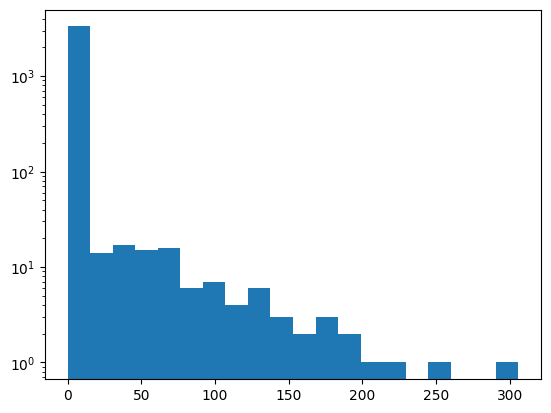

In [ ]:
degrees = [val for (node, val) in GG.degree()]
x=plt.hist(degrees,log=True,bins=20)

In [ ]:
print(GG.number_of_nodes())
print(GG.number_of_edges())

3408
7809


## see how lowering confidence threshold, based on presence in X/10 runs changes the intersection graph

In [ ]:
DD=data[['TF','Gene','source_file']].drop_duplicates()


In [ ]:
grouped = DD.groupby(['TF','Gene']).count()
intersect=grouped.reset_index()[['TF','Gene','source_file']]

### 80% confidence in links based on bootstrap runs

In [ ]:
ninety=intersect[intersect.source_file>7]

In [ ]:
G = nx.DiGraph()  # Use DiGraph for directed edges, or Graph for undirected

# Step 3: Add edges to the graph
for index, row in ninety.iterrows():
        gene = row['Gene']
        tf = row['TF']
        rho_TF2G = row['source_file']

        # Add an edge from TF to Gene with weight as rho_TF2G
        G.add_edge(tf, gene, weight=rho_TF2G/10)

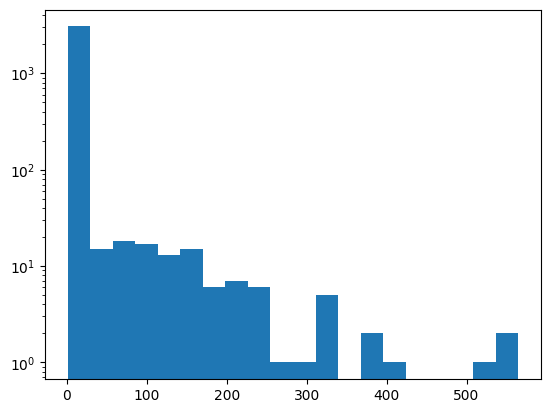

In [ ]:
degrees = [val for (node, val) in G.degree()]
x=plt.hist(degrees,log=True,bins=20)

In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

3167
16435


In [ ]:
# !pip install graphistry
# import graphistry
# from google.colab import userdata
# g_user=userdata.get('g_user')
# g_pass=userdata.get('g_pass')
# graphistry.register(api=3,protocol="https", server="hub.graphistry.com", username=g_user, password=g_pass) ## key id, secret key


In [ ]:
plotter = graphistry.bind(source='TF', destination='Gene')
plotter.plot(ninety[['TF','Gene','source_file']])